# Ερευνητικό έργο

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open("../vlachos_pubs.json", "r") as f:
    db_export = json.load(f)

data = None
for item in db_export:
    if item["type"] == "table" and item["name"] == "stats":
        for record in item["data"]:
            if record["type"] == "stats":
                stats = json.loads(record["value"])
            elif record["type"] == "tags":
                tags = json.loads(record["value"])
            else:
                cites_per_year = json.loads(record["value"])
    elif item["type"] == "table" and item["name"] == "publications":
        publications = item["data"]

## Γενικά στατιστικά στοιχεία

- **Google Scholar ID**: _FrZJcYAAAAJ&hl=el
- **Cited by**: 2044
- **Cited by (5 years)**: 684
- **h-Index**: 26
- **h-Index (5 years)**: 14
- **i10-Index**: 52
- **i10-Index n(5 years)**: 19

## Αναφορές

Στο ακόλουθο διάγραμμα, φαίνεται η εξέλιξη το συνόλου των αναφορών σαν συνάρτηση του χρόνου.

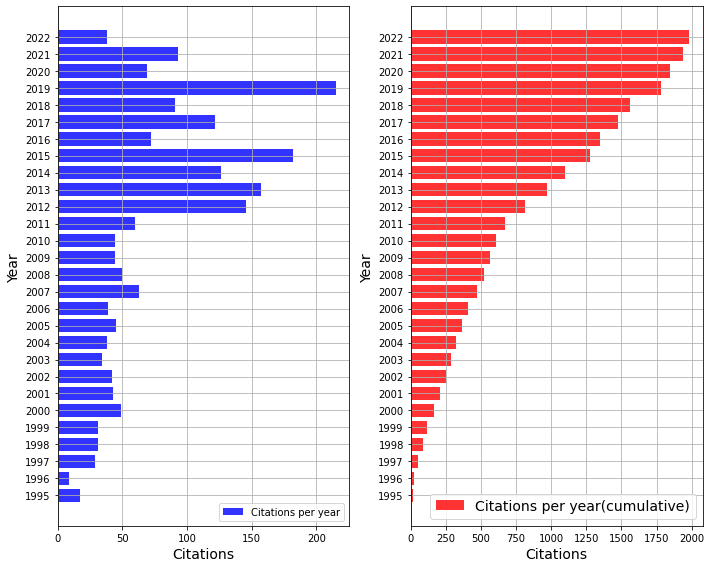

In [3]:
citations = np.array(list(cites_per_year.values()))
years = list(cites_per_year.keys())
f, ax = plt.subplots(1, 2)
x_len = range(len(cites_per_year.keys()))
ax[0].barh(years, width=citations, color='blue', alpha=0.8, label="Citations per year")
ax[1].barh(years, width=citations.cumsum(), color='red', alpha=0.8, label="Citations per year(cumulative)")
ax[0].legend(loc='lower right')
ax[0].grid()
ax[0].set_xlabel('Citations', fontsize=14)
ax[0].set_ylabel('Year', fontsize=14)
ax[1].set_xlabel('Citations', fontsize=14)
ax[1].set_ylabel('Year', fontsize=14)
ax[1].legend(loc='lower right', fontsize=14)
ax[1].grid()
f.set_size_inches(10, 8)
f.tight_layout()

## Επιστημονικά πεδία

Στο ακόλουθο διάγραμμα, φαίνεται η ο αριθμός των δημοσιεύσεων σε σχέση με το επιστημονικό πεδίο στο οποίο αναφέρονται.

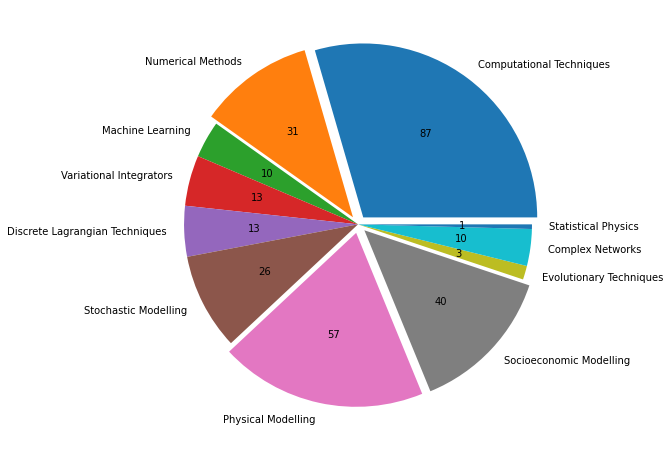

In [4]:
total_pubs = len(publications)
tag_density = {}
for record in publications:
    if record["valid"] == "0":
        continue
    record_tags = record["tags"].split(',')
    for tag in record_tags:
        tag = tag.strip()
        try:
            tag_density[tag]["value"] += 1
        except KeyError:
            tag_density[tag] = {"value": 1, "name": tags[tag]}
            
values = [int(item[1]["value"]) for item in tag_density.items()]
labels = [item[1]["name"] for item in tag_density.items()]
explodes = [0.05, 0.05, 0, 0, 0, 0, 0.05, 0.05, 0, 0, 0]              
f, ax = plt.subplots();
ax.pie(values, labels=labels, explode=explodes, autopct=lambda x: int(x * total_pubs/60))
f.set_size_inches(8, 8)
plt.show()
            